# LS123: Large N and Hypothesis Testing

This lab will cover the basics of statistical sampling, the law of averages, and hypothesis testing. You should gain an intuition around how samples relate to populations, and the basics of statistical inference in the social sciences.

In [2]:
from collections import Counter
import numpy as np
import pandas as pd
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plot
plot.style.use('fivethirtyeight')

## Data

We'll continue using the ANES data for this lab!

In [3]:
anes = pd.read_csv('../data/anes/ANES_legalst123_cleaned.csv')
anes.head()

,Unnamed: 0,pre_election_weight_ftf,post_election_weight_ftf,pre_voting_status,pre_economy_last_year,pre_party_id,pre_gun_access_importance,pre_unauthorized_immigrants,pre_birthright_citizenship,pre_govt_assist_to_blacks,...,post_discrim_christian,post_discrim_transgender,post_discrim_personal,post_skintone,post_discrim_skintone,post_support_trump,post_gender,post_age_est,post_inform_level,post_intelligence
0,0,0.887,0.927,3,5.0,7.0,2.0,3.0,4.0,7.0,...,4.0,4.0,NaN,3.0,4.0,NaN,NaN,NaN,4.0,4.0
1,1,1.160,1.084,3,3.0,6.0,1.0,1.0,1.0,7.0,...,4.0,1.0,NaN,3.0,4.0,NaN,NaN,NaN,1.0,2.0
2,2,0.416,0.398,1,3.0,3.0,2.0,1.0,7.0,7.0,...,2.0,1.0,NaN,2.0,4.0,NaN,NaN,NaN,4.0,3.0
3,3,0.385,0.418,4,3.0,5.0,1.0,3.0,4.0,5.0,...,3.0,2.0,NaN,4.0,4.0,NaN,NaN,NaN,2.0,2.0
4,4,0.693,0.726,3,3.0,3.0,1.0,3.0,6.0,7.0,...,2.0,3.0,NaN,2.0,5.0,NaN,NaN,NaN,4.0,3.0


## Sampling and Empirical Distributions

### Data Manipulation and Plotting Review

Let's look at how liberal respondents characterized themselves as post-election. Write code that saves the "post_liberal_rating" column in the ANES data to a Series variable. Keep in mind that valid answers have domain [0,100] so be sure to subset to only those values.

In [4]:
liberal = anes.loc[:, "post_liberal_rating"]
liberal = liberal.where(liberal < 150)

Plot a histogram of the data:

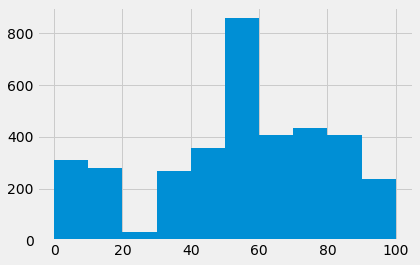

In [5]:
liberal.hist()

### Question 1

What patterns do you notice? Where is the center of the distribution? What does this suggest about how Americans tend to self-identify?

Answer: The data are unimodal, with responses around "50" being the most common. In part, this may be because people tend to offer middle options when presented with these sorts of survey questions. It could also suggest that Americans tend to identify more toward the middle of the political spectrum than either end of it.

### Law of Averages

Write a function, "empirical_hist_anes" that takes a Series and a sample size as its argument, and then draws a histogram based on the results. Consult Adhikari and DeNero for help!

In [6]:
def empirical_hist_anes(series, n):
    series.sample(n).hist()

Check how many rows are in the table with the "size" method, and then use your self-defined function to plot histograms taking sample sizes 10, 100, 1000, and the total number of rows.

In [7]:
liberal.size

4271

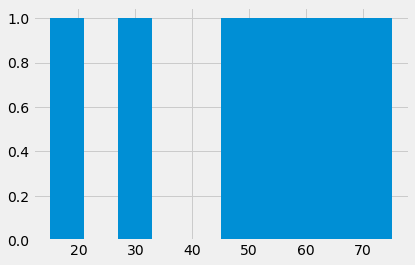

In [8]:
empirical_hist_anes(liberal, 10)

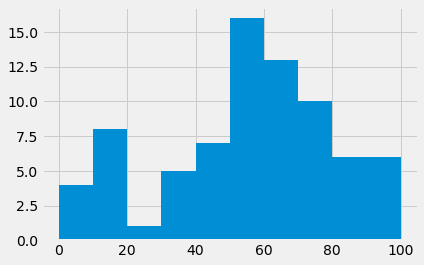

In [9]:
empirical_hist_anes(liberal, 100)

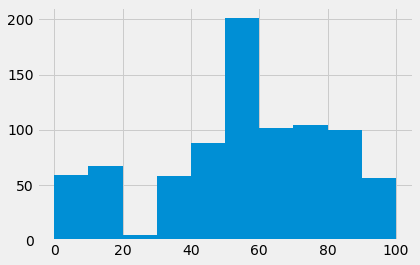

In [10]:
empirical_hist_anes(liberal, 1000)

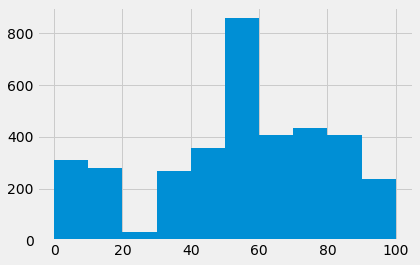

In [11]:
empirical_hist_anes(liberal, liberal.size)

### Question 2

What happens to the histograms (compared to the original in Q1) as you increase the sample size? How does this relate to the Law of Averages? What is the relationship between sample size and population parameter estimation?

## Hypothesis Testing

In this section, we'll cover the basic tools for hypothesis testing. 

The goal in conducting a hypothesis test is to answer the question, "Was it likely to observe my test statistic due to chance?" We say something is statistically significant if it is sufficiently far enough away from the center of an empirical distribution, and therefore unlikely to have occurred just by chance.

The basic way to frame a hypothesis test is as follows:

1. Define a null $(H_O)$ and alternative $(H_A)$ hypothesis. The null hypothesis is usually framed as "no statistical relationship between the observed data and the background distribution" and the alternative hypothesis is the opposite. More concretely, the null is our default position, and assumes that the observed statistic likely came from the background distribution.

2. Calculate a test statistic (for example, t-test, $\chi^2$, etc.)

3. Check if the test statistic is far enough away from the center of the distribution. Traditionally, this was done by checking against a reference table, but in Python, we'll use p-values. Typically, a p value of less than .05 (meaning that only 5% of observations should fall where the test statistic does) is used as the threshold for statistical significance in the social sciences.

4. Either reject or fail to reject the null hypothesis.

### Jury Selection

First, we'll use the jury selection example from the Adhikari and DeNero book. This example is based on the U.S. Supreme Court case, Swain v. Alabama. Robert Swain was convicted by an all-white jury, and challenged his conviction on the basis that it was statistically unlikely that a jury would be all-white by chance, given that the racial composition of the county was 18% black. Juries were selected from a panel of 100. In this case, only 8 jurors on the panel were black.

Was it likely that the panel would only include 8 black jurors out of 100, given that 18% of the county was black?

In [12]:
# Create the table
jury = pd.DataFrame(data = {'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
                           'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
                           'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]}
)

jury

,Eligible,Ethnicity,Panels
0,0.15,Asian,0.26
1,0.18,Black,0.08
2,0.12,Latino,0.08
3,0.54,White,0.54
4,0.01,Other,0.04


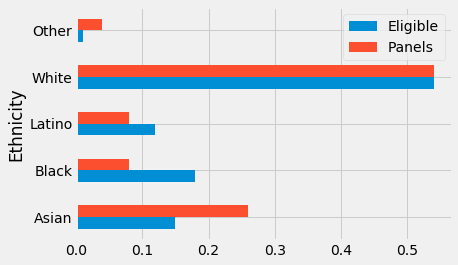

In [13]:
# Horizontal Bar Chart
jury.plot.barh('Ethnicity')

In [14]:
# Augment with the difference between the "panels" columns and "eligible" column
jury_with_diffs = jury.assign(Difference = jury.loc[:, 'Panels'] - jury.loc[:, 'Eligible'])
jury_with_diffs

,Eligible,Ethnicity,Panels,Difference
0,0.15,Asian,0.26,0.11
1,0.18,Black,0.08,-0.10
2,0.12,Latino,0.08,-0.04
3,0.54,White,0.54,0.00
4,0.01,Other,0.04,0.03


**Testing the hypothesis:**
In this scenario, the null hypothesis is that the jury panel was drawn uniformly from the eligible jury pool. Think of this as a statistical model. We will ask: under a model of uniform jury selection, how likely is it that Swain's jury panel would be selected? If we find it to be sufficiently unlikely, you may conclude that the model does not describe reality, i.e. that his jury panel was not selected uniformly.

**Simulate selection of 1000 jury panels uniformly from the eligible jury pool.** This should generate a DataFrame with a column for each race, and each row describing the proportion of each race represented in one jury panel.

In [46]:
def sample_proportions(probabilities, samples):
    # You may have used datascience.sample_proportions; this is how it works.
    # Read more here https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.multinomial.html
    return np.random.multinomial(samples, probabilities) / samples

def sample_jury_panel(panel_size=100):
    """
    Generate one sample panel of potential jurors by race,
    drawn uniformly from the eligble pool
    """
    return sample_proportions(jury['Eligible'], panel_size)

simulated_fair_panels = pd.DataFrame([ sample_jury_panel() for _ in range(1000) ], columns=jury['Ethnicity'])

simulated_fair_panels.head(2)

Ethnicity,Asian,Black,Latino,White,Other
0,0.14,0.18,0.12,0.52,0.04
1,0.16,0.23,0.15,0.45,0.01


**Visualize the distribution for each race.** As a first look, how common would a panel like the one in Swain v. Alabama appear to be?

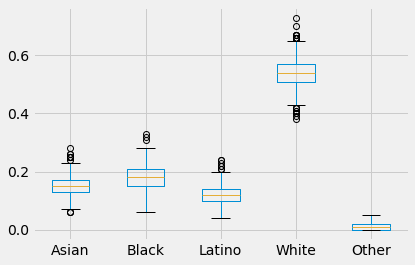

In [51]:
simulated_fair_panels.boxplot()

**Compute a t-test between the 'Panels' column and your sample of simulated jury panels.** Hint: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind

Think about the p-values you get, and precisely what they mean for Swain's jury.

In [52]:
stats.ttest_ind(simulated_fair_panels, jury['Panels'], equal_var=False)

Ttest_indResult(statistic=array([-0.53448571, -0.21873026, -0.86463496,  3.65709017, -2.0396685 ]), pvalue=array([ 0.62132327,  0.83756382,  0.43599875,  0.02161297,  0.11098368]))

Since the legal question in this case is concerned with specifically the representation of black jurors, specifically on Swain's jury panel, we can use some simpler statistics. **Visualize the distribution of the 'Black' column in the simulated jury panels, and compute the portion of simulated jury panels having under 9% black jurors.**

Portion of uniformly selected panels with under 9% black jurors:  0.004


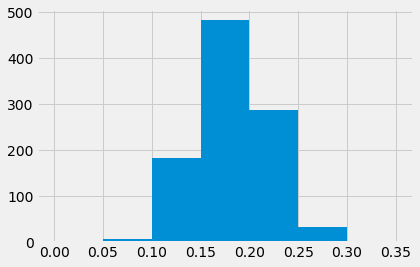

In [70]:
print(
    "Portion of uniformly selected panels with under 9% black jurors: ",
    simulated_fair_panels[simulated_fair_panels['Black'] < 0.09].count()['Black'] / simulated_fair_panels['Black'].count()
)

simulated_fair_panels['Black'].hist(bins=[ n / 100 for n in range(0, 40, 5) ])

### Hypothesis Testing on ANES Data

Now let's try with the ANES data! Write code that creates a new DataFrame with the "post_liberal_rating" and "post_conservative_rating" as columns, and only includes values below 150.

In [15]:
liberal_v_conservative = anes.loc[:, ["post_liberal_rating", "post_conservative_rating"]]
liberal_v_conservative = liberal_v_conservative.where(liberal_v_conservative["post_liberal_rating"] < 150)
liberal_v_conservative = liberal_v_conservative.where(liberal_v_conservative["post_conservative_rating"] < 150)

liberal_v_conservative.head()

,post_liberal_rating,post_conservative_rating
0,50.0,70.0
1,50.0,60.0
2,50.0,50.0
3,50.0,50.0
4,70.0,70.0


### Question 3

Plot a histogram of both the post liberal rating and post conservative rating side by side. Experiment with different bin widths. Visually, what can you infer about the shape of each data?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C5B064F9B0>,
      dtype=object)

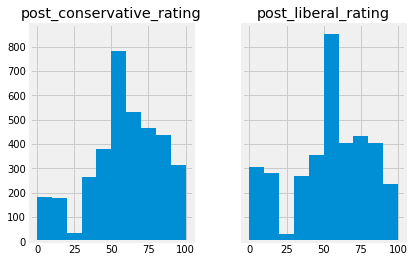

In [16]:
liberal_v_conservative.hist(sharex=True, sharey=True)

### Question 4

Now write code to do a t-test between liberal and conservative. For the t-test to work, you have to remove NaN values first.

In [17]:
liberal_v_conservative.dropna(inplace=True)

In [18]:
stats.ttest_ind(liberal_v_conservative['post_liberal_rating'], liberal_v_conservative['post_conservative_rating'], equal_var = False)

Ttest_indResult(statistic=-7.614943160878035, pvalue=2.979529907898513e-14)

What does the pvalue of this t-test indicate? Can we reject the null hypothesis that the mean of the two distributions differs significantly among samples given a 95% confidence?

## Central Limit Theorem

The central limit theorem (CLT) is a fundamental concept in statistics. It basically says that the means of repeated samples will converge upon a normal distribution centered around the population mean. This is a powerful result that allows us to use a sample mean without measuring other sample means. This insight is particularly important in the social sciences, and justifies the use of regression for causal inference.

Using liberal respondents ("post_liberal_rating") again, let's illustrate this concept. Write code that does the following:

1. Define a sample size, and number of repetitions. Also, create an empty array to store the sample means.

2. Write a for loop that loops over the number of repetitions and:
    a. Samples the liberal respondents by the sample size
    b. Calculates its mean
    c. Appends the calculated mean to the array that stores sample means

Using this code, experiment with various sample sizes and number of repetitions. Plot each result. For instance, try the following:

1. Sample size = 20, repetititon = 10
2. Sample size = 100, repetitions = 10
3. Sample size = 100, repetitions = 100000
4. Sample size = 500, repetitions = 100000
5. Sample size = 1000, repetitions = 150000

(array([1., 0., 3., 3., 0., 1., 1., 0., 0., 1.]),
 array([42.29411765, 44.26470588, 46.23529412, 48.20588235, 50.17647059,
        52.14705882, 54.11764706, 56.08823529, 58.05882353, 60.02941176,
        62.        ]),
 <a list of 10 Patch objects>)

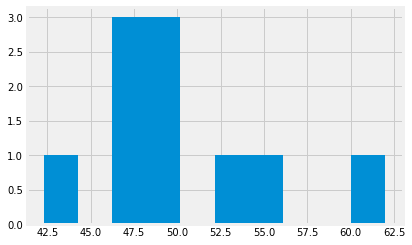

In [19]:
sample_size = 20
repetitions = 10

means = []

for i in np.arange(repetitions):
    sample = liberal.sample(sample_size)
    new_mean = np.mean(sample)
    means = np.append(means, new_mean)

plot.hist(means)

(array([1., 0., 0., 1., 1., 1., 0., 1., 3., 2.]),
 array([47.11627907, 47.72093023, 48.3255814 , 48.93023256, 49.53488372,
        50.13953488, 50.74418605, 51.34883721, 51.95348837, 52.55813953,
        53.1627907 ]),
 <a list of 10 Patch objects>)

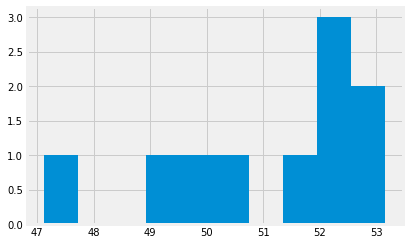

In [20]:
sample_size = 100
repetitions = 10

means = []

for i in np.arange(repetitions):
    sample = liberal.sample(sample_size)
    new_mean = np.mean(sample)
    means = np.append(means, new_mean)

plot.hist(means)

(array([3.1000e+01, 4.7700e+02, 3.8480e+03, 1.5791e+04, 3.1148e+04,
        3.0504e+04, 1.4436e+04, 3.3970e+03, 3.4900e+02, 1.9000e+01]),
 array([39.16049383, 41.6534188 , 44.14634378, 46.63926876, 49.13219373,
        51.62511871, 54.11804368, 56.61096866, 59.10389364, 61.59681861,
        64.08974359]),
 <a list of 10 Patch objects>)

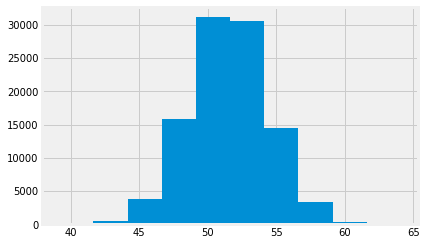

In [21]:
sample_size = 100
repetitions = 100000

means = []

for i in np.arange(repetitions):
    sample = liberal.sample(sample_size)
    new_mean = np.mean(sample)
    means = np.append(means, new_mean)

plot.hist(means)

(array([1.8000e+01, 3.5000e+02, 3.1980e+03, 1.3267e+04, 2.8928e+04,
        3.1640e+04, 1.7239e+04, 4.6950e+03, 6.2300e+02, 4.2000e+01]),
 array([46.16037736, 47.20477128, 48.2491652 , 49.29355911, 50.33795303,
        51.38234695, 52.42674087, 53.47113479, 54.51552871, 55.55992263,
        56.60431655]),
 <a list of 10 Patch objects>)

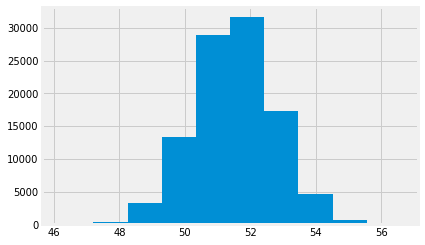

In [22]:
sample_size = 500
repetitions = 100000

means = []

for i in np.arange(repetitions):
    sample = liberal.sample(sample_size)
    new_mean = np.mean(sample)
    means = np.append(means, new_mean)

plot.hist(means)

(array([2.9000e+01, 6.1000e+02, 5.3380e+03, 2.3481e+04, 4.8043e+04,
        4.6420e+04, 2.1105e+04, 4.5290e+03, 4.2600e+02, 1.9000e+01]),
 array([48.8392283 , 49.37786836, 49.91650842, 50.45514849, 50.99378855,
        51.53242861, 52.07106868, 52.60970874, 53.1483488 , 53.68698887,
        54.22562893]),
 <a list of 10 Patch objects>)

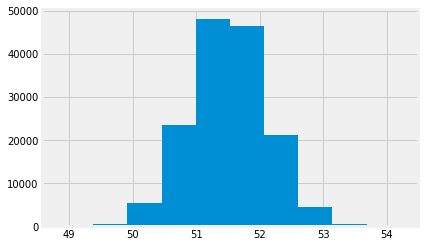

In [23]:
sample_size = 1500
repetitions = 150000

means = []

for i in np.arange(repetitions):
    sample = liberal.sample(sample_size)
    new_mean = np.mean(sample)
    means = np.append(means, new_mean)

plot.hist(means)

### Question 5: What happens as you increase the sample size and number of repetitions? How does this property justify the use of statistical methods across a range of problems?

Answer: